In [2]:
'''
step05_regress 관련 문제 
문1) score_iq.csv 데이터셋을 이용하여 단순선형회귀모델을 생성하시오.
   <조건1> y변수 : score, x변수 : academy      
   <조건2> 회귀모델 생성과 결과확인(회귀계수, 설명력, pvalue, 표준오차) 
   <조건3> 회귀선 적용 시각화 
   
문2) irsi.csv 데이터셋을 이용하여 다중선형회귀모델을 생성하시오.
   <조건1> 칼럼명에 포함된 '.' 을 '_'로 수정
   <조건2> y변수 : 1번째 칼럼, x변수 : 2~4번째 칼럼    
   <조건3> 회귀계수 확인 
   <조건4> 회귀모델 세부 결과 확인  : summary()함수 이용  
'''

from scipy import stats
import pandas as pd
import statsmodels.formula.api as sm

# 문1) score_iq.csv 파일의 academy와 score 칼럼을 대상으로 회귀모델을 생성하시오.
'''
귀무가설 : academy는 score에 영향을 미치지 않는다.
대립가설 : academy는 score에 영향을 미친다.
'''

'\n귀무가설 : academy는 score에 영향을 미치지 않는다.\n대립가설 : academy는 score에 영향을 미친다.\n'

In [6]:

# 1. 단순 선형회귀분석(stats)

score = pd.read_csv('C:/Users/hyebin/Desktop/Python_ML/data/score_iq.csv')

x = score.academy # 독립변수  
y = score.score # 종속변수

score.head()

,sid,score,iq,academy,game,tv
0,10001,90,140,2,1,0
1,10002,75,125,1,3,3
2,10003,77,120,1,0,4
3,10004,83,135,2,3,2
4,10005,65,105,0,4,4


In [7]:
model = stats.linregress(x, y)
print(model)
print('x 기울기 : ', model.slope) 
print('y 절편 :', model.intercept)
print('설명력 : ', model.rvalue)
print('p값 : ', model.pvalue) # F검정 통계량 
print('x 표준오차 :' , model.stderr)

LinregressResult(slope=4.847829398324448, intercept=68.23926884996192, rvalue=0.8962646792534941, pvalue=4.036716755167245e-54, stderr=0.19719368077532995)
x 기울기 :  4.847829398324448
y 절편 : 68.23926884996192
설명력 :  0.8962646792534941
p값 :  4.036716755167245e-54
x 표준오차 : 0.19719368077532995


In [8]:
# 2. 회귀방정식 관련 함수 
from scipy import polyval

# y = x기울기*x + 절편 
# polyval([x기울기, 절편], x변량)
reg_line = polyval([model.slope, model.intercept], score['academy']) 
print(reg_line) # 예측치(fitted value)

[77.93492765 73.08709825 73.08709825 77.93492765 68.23926885 82.78275704
 82.78275704 73.08709825 87.63058644 77.93492765 73.08709825 73.08709825
 77.93492765 68.23926885 82.78275704 68.23926885 82.78275704 82.78275704
 73.08709825 87.63058644 77.93492765 73.08709825 82.78275704 82.78275704
 73.08709825 87.63058644 77.93492765 73.08709825 73.08709825 77.93492765
 68.23926885 82.78275704 68.23926885 82.78275704 82.78275704 82.78275704
 82.78275704 73.08709825 87.63058644 77.93492765 73.08709825 82.78275704
 82.78275704 73.08709825 87.63058644 77.93492765 73.08709825 73.08709825
 77.93492765 73.08709825 77.93492765 68.23926885 82.78275704 82.78275704
 73.08709825 87.63058644 77.93492765 73.08709825 73.08709825 77.93492765
 68.23926885 82.78275704 68.23926885 82.78275704 82.78275704 73.08709825
 87.63058644 77.93492765 73.08709825 82.78275704 73.08709825 87.63058644
 77.93492765 73.08709825 73.08709825 77.93492765 68.23926885 82.78275704
 68.23926885 82.78275704 82.78275704 82.78275704 82

<ipython-input-8-95ebcb71fbc6>:6: DeprecationWarning: scipy.polyval is deprecated and will be removed in SciPy 2.0.0, use numpy.polyval instead
  reg_line = polyval([model.slope, model.intercept], score['academy'])


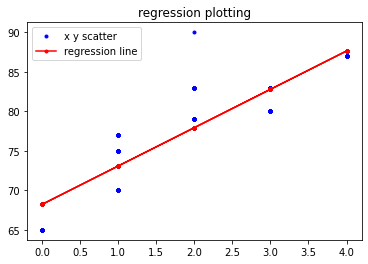

In [9]:
# 회귀모델 관련 시각화 
from pylab import plot, title, legend, show
# plot : 산점도
# title, legend : 제목, 범례
# show : 차트 출력 

# 산점도 
plot(score['academy'], score['score'], 'b.') # 파랑색 
plot(score['academy'], reg_line, 'r.-') # 빨강색 
title('regression plotting') # 제목 
legend(['x y scatter', 'regression line']) # 범례 
show()

In [10]:
# 문2) irsi.csv 데이터셋을 이용하여 다중선형회귀모델을 생성하시오.
# formula 형식의 회귀모델 생성 

# 다중 선형회귀모델 
iris = pd.read_csv('C:/Users/hyebin/Desktop/Python_ML/data/iris.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
# iris 칼럼명 수정 
iris.columns = ['one','two','three', 'four', 'five']
iris.head()

,one,two,three,four,five
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
# formula 구성 : 칼럼에 . 제거 
iris_model = sm.ols(formula="one ~ two+three+four", data=iris).fit()

# 회귀계수
print(iris_model.params)

Intercept    1.855997
two          0.650837
three        0.709132
four        -0.556483
dtype: float64


In [17]:

print(iris_model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    one   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     295.5
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           8.59e-62
Time:                        23:14:38   Log-Likelihood:                -37.321
No. Observations:                 150   AIC:                             82.64
Df Residuals:                     146   BIC:                             94.69
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8560      0.251      7.401      0.0